In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

item_c = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')
items = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
sales_train = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
shops = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')
sale_test = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')

In [2]:
print('Info', sales_train.info())
#print('Columns', sale_train.columns())
#print('Dtype', sale_train.dtype())
print('Shape', sales_train.shape)
print('Null', sales_train.isna().sum())
print('Missing', sales_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
Info None
Shape (2935849, 6)
Null date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
Missing date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [3]:
np.round(sales_train.describe(include = 'all'), 2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
unique,1034,NaN,NaN,NaN,NaN,NaN
top,28.12.2013,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.57,33.00,10197.23,890.85,1.24
std,NaN,9.42,16.23,6324.30,1729.80,2.62
min,NaN,0.00,0.00,0.00,-1.00,-22.00
25%,NaN,7.00,22.00,4476.00,249.00,1.00
50%,NaN,14.00,31.00,9343.00,399.00,1.00
75%,NaN,23.00,47.00,15684.00,999.00,1.00


2910156     42990.0
2327159     49782.0
1488135     50999.0
885138      59200.0
1163158    307980.0
Name: item_price, dtype: float64
------------------
               date  date_block_num  shop_id  item_id  item_price  \
1163158  13.12.2013              11       12     6066    307980.0   

         item_cnt_day  
1163158           1.0  


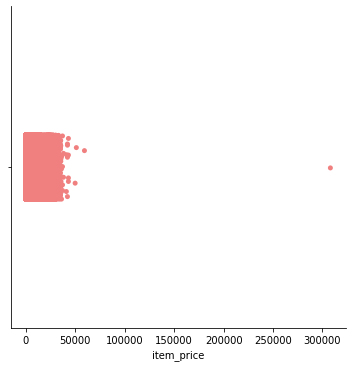

In [4]:
print(sns.catplot(x = 'item_price', data = sales_train, color = 'lightcoral'))
print(sales_train['item_price'].sort_values().tail())
print('------------------')
print(sales_train[sales_train['item_price'] == 307980.0])

In [5]:
sales_train.drop(sales_train.index[1163158], axis = 0, inplace = True)

In [6]:
#drop negative prices#
np.round(sales_train['item_cnt_day'].describe(), 2)
print(sales_train.sort_values('item_price').head())
sales_train.drop(sales_train.index[484683], axis = 0, inplace = True)

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973     -1.0000           1.0
608763  08.06.2013               5       58    11865      0.0700           1.0
579766  11.06.2013               5        6    11864      0.0700           1.0
611400  08.06.2013               5       58    20146      0.0875           4.0
673155  31.07.2013               6        6    11872      0.0900           1.0


In [7]:
#we can see that 'date' column in sales_data is an object but if we want to manipulate 
#it or want to work on it someway then we have convert it on datetime format
sales_train['date'] = pd.to_datetime(sales_train['date'],format = '%d.%m.%Y')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [8]:
#now we will create a pivot tabel by going so we get our data in desired form 
#we want get total count value of an item over the whole month for a shop 
# That why we made shop_id and item_id our indices and date_block_num our column 
# the value we want is item_cnt_day and used sum as aggregating function 
data_train = sales_train.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
data_train.head()

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  

[5 rows x 34 columns]

In [9]:
# lets reset our indices, so that data should be in way we can easily manipulate
data_train.reset_index(inplace = True)
data_train.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [10]:
# Now we will merge our pivot table with the test_data because we want to keep the data of items we have
# predict beacause we need 2014200 row of sumittion
data_train = pd.merge(sale_test,data_train,on = ['item_id','shop_id'],how = 'left')
data_train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# lets fill all NaN values with 0
data_train.fillna(0,inplace = True)
data_train.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# we will drop shop_id and item_id because we do not need them
# we are teaching our model how to generate the next sequence 
data_train.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
data_train.tail()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_train.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# X we will keep all columns execpt the last one 
x_train = data_train.iloc[:,:-1]
# the last column is our label
y_train = data_train.iloc[:,-1:]

# for test we keep all the columns execpt the first one
x_test = data_train.iloc[:,1:]

# lets have a look on the shape 
print(x_train.shape,y_train.shape,x_test.shape)


(214200, 33) (214200, 1) (214200, 33)


In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_scale = scaler.fit_transform(x_train)
x_scale

array([[-0.09329998, -0.09155857, -0.08126172, ...,  0.35267059,
         1.26619439,  0.29027058],
       [-0.09329998, -0.09155857, -0.08126172, ..., -0.11394073,
        -0.1293878 , -0.10989391],
       [-0.09329998, -0.09155857, -0.08126172, ..., -0.11394073,
         0.33580626,  1.09059955],
       ...,
       [ 0.87627384, -0.09155857, -0.08126172, ..., -0.11394073,
        -0.1293878 , -0.10989391],
       [-0.09329998, -0.09155857, -0.08126172, ..., -0.11394073,
        -0.1293878 , -0.10989391],
       [-0.09329998, -0.09155857, -0.08126172, ..., -0.11394073,
        -0.1293878 , -0.10989391]])

In [16]:
#linear regression#

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr = lr.fit(x_train, y_train)
print(model_lr.score(x_train, y_train))
print(model_lr.coef_)
print(model_lr.intercept_)

0.5147429268717022
[[-0.01530253 -0.14627167  0.05810844 -0.02782427 -0.17344619  0.18545325
  -0.2600206  -0.14402271  0.06066287 -0.233685    0.79915512 -0.36614559
  -0.34603901  0.50429642  0.14226    -0.46147721  0.16438248 -0.09743502
  -0.09598259 -0.1073886  -0.00133612 -0.24108492 -0.10858536  0.04246198
   0.33078176  0.01893904  0.13942442 -0.01450223  0.41693716 -0.02092306
   0.77368142 -0.29673949  0.59146192]]
[-0.05704087]


In [17]:
#ridge regression#

from sklearn.linear_model import Ridge
ridge = Ridge()
model_ridge = ridge.fit(x_train, y_train)
print(model_ridge.score(x_train, y_train))

0.5147429268698303


In [18]:
#lasso#

from sklearn import linear_model
lasso = linear_model.Lasso()
model_lasso = lasso.fit(x_train, y_train)
print(model_lasso.score(x_train, y_train))

0.4073592636024106


In [19]:
#random forest#
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 100)
model_rf = rf.fit(x_train, y_train)
print(model_rf.score(x_train, y_train))
yhat_rf = model_rf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9362558356676004


In [25]:
# creating submission file 
submission_pfs = model_rf.predict(x_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':sale_test['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('submission.csv',index = False)


In [26]:
submission

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
214195,214195,0.0
214196,214196,0.0
214197,214197,0.0
214198,214198,0.0
